# Chapter 11: Uncertainty Intervals

## Modeling uncertainty in trends

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import numpy as np
np.random.seed(42)

df = pd.read_csv('../data/baltimore_crime.csv')
df.columns = ['ds', 'y']

c:\users\gregr\appdata\local\programs\python\python38\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


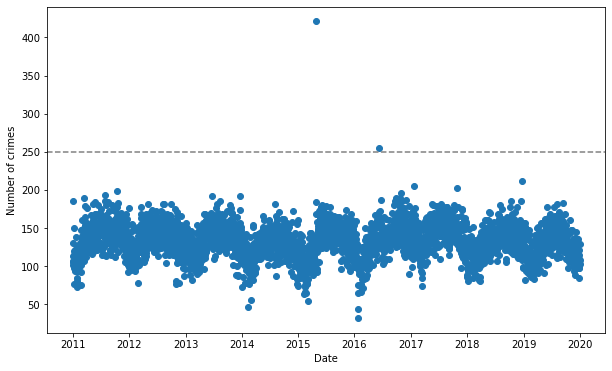

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['y'])
plt.axhline(250, ls='--', c='gray')
plt.xlabel('Date')
plt.ylabel('Number of crimes')
plt.show()

In [3]:
df.loc[df['y'] > 250, 'y'] = None

10:23:17 - cmdstanpy - INFO - Chain [1] start processing
10:23:19 - cmdstanpy - INFO - Chain [1] done processing


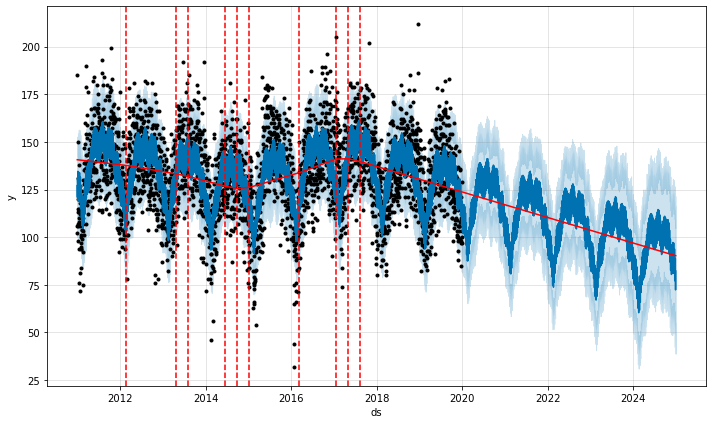

In [4]:
model = Prophet(uncertainty_samples=1000)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

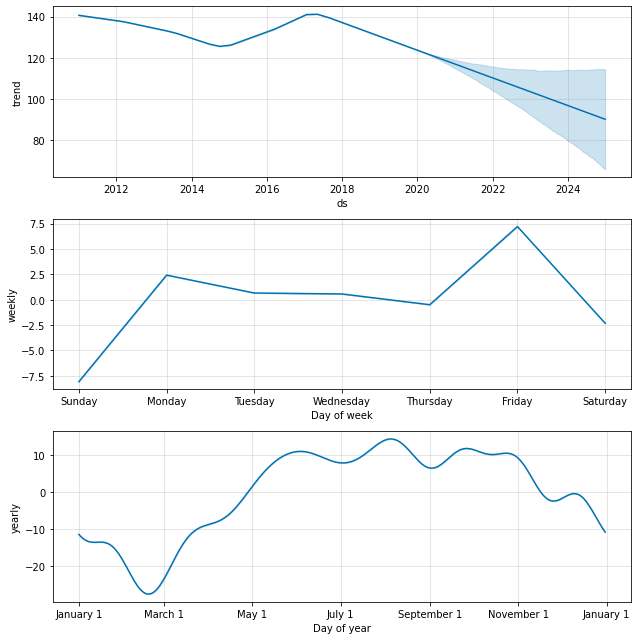

In [5]:
fig2 = model.plot_components(forecast)
plt.show()

In [6]:
# Saving for use later
m0 = model
f0 = forecast

In [7]:
samples = model.predictive_samples(future)

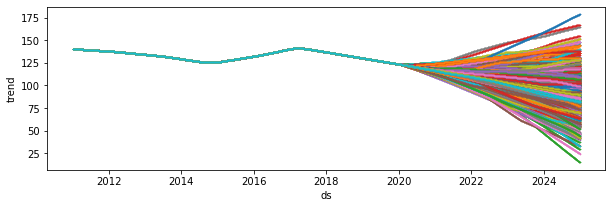

In [8]:
samples = model.predictive_samples(future)

plt.figure(figsize=(10, 3))
for idx in range(model.uncertainty_samples):
    plt.scatter(future['ds'], samples['trend'][:, idx], s=.1, alpha=1)
plt.xlabel('ds')
plt.ylabel('trend')
plt.show()

In [9]:
model = Prophet(interval_width=0.99)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
forecast = model.predict(future)

10:24:09 - cmdstanpy - INFO - Chain [1] start processing
10:24:11 - cmdstanpy - INFO - Chain [1] done processing


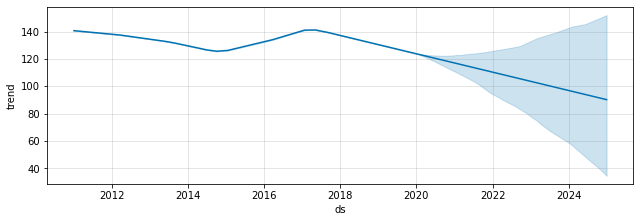

In [10]:
from prophet.plot import plot_forecast_component

plot_forecast_component(model,
                        forecast,
                        'trend',
                        figsize=(10.5, 3.25))
plt.show()

## Modeling uncertainty in seasonality

10:24:17 - cmdstanpy - INFO - CmdStan installation c:\users\gregr\appdata\local\programs\python\python38\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
10:24:17 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
10:24:17 - cmdstanpy - INFO - CmdStan start processing
10:24:17 - cmdstanpy - ERROR - Error in progress bar initialization:
	"Unknown argument(s): {'colour': 'yellow'}"
Disabling progress bars for this session
Exception ignored in: <function tqdm.__del__ at 0x0000015C25DF6310>
Traceback (most recent call last):
  File "c:\users\gregr\appdata\local\programs\python\python38\lib\site-packages\tqdm\std.py", line 1086, in __del__
    self.close()
  File "c:\users\gregr\appdata\local\programs\python\python38\lib\site-packages\tqdm\notebook.py", line 244, in close
    if self.total and self.n < self.total:
AttributeError: 'tqdm_notebook' object has no attribute 'total'


10:38:26 - cmdstanpy - INFO - CmdStan done processing.


10:38:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0

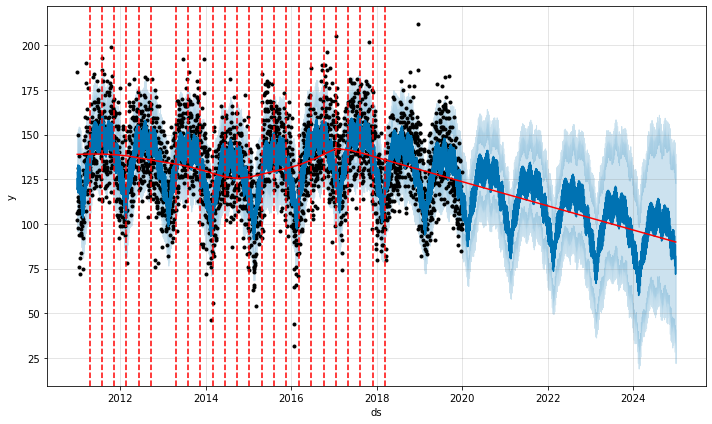

In [11]:
model = Prophet(mcmc_samples=300)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

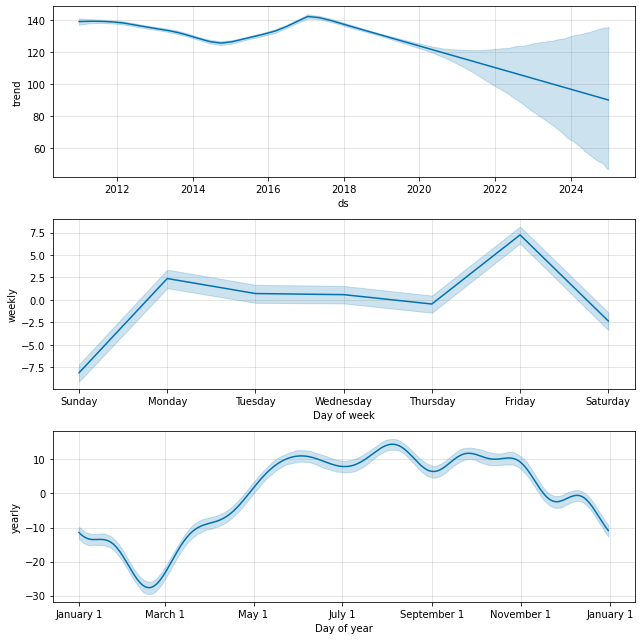

In [12]:
fig2 = model.plot_components(forecast)
plt.show()

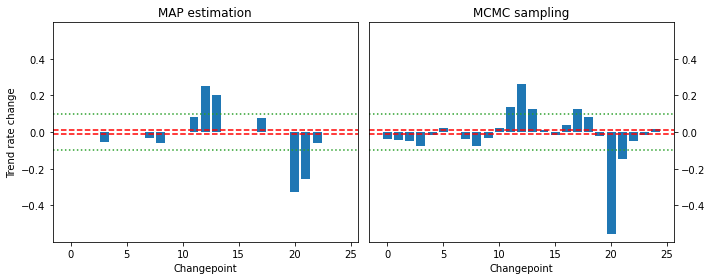

In [13]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121)
ax1.bar(np.arange(25), np.nanmean(m0.params['delta'], axis=0))
ax1.set_title('MAP estimation')
ax1.set_xlabel('Changepoint')
ax1.set_ylabel('Trend rate change')
ax1.axhline(y=0.01, color='r', ls='--')
ax1.axhline(y=-0.01, color='r', ls='--')
ax1.axhline(y=0.1, color='tab:green', ls=':')
ax1.axhline(y=-0.1, color='tab:green', ls=':')

ax2 = fig.add_subplot(122)
ax2.bar(np.arange(25), np.nanmean(model.params['delta'], axis=0))
ax2.set_xlabel('Changepoint')
ax2.axhline(y=0.01, color='r', ls='--')
ax2.axhline(y=-0.01, color='r', ls='--')
ax2.axhline(y=0.1, color='tab:green', ls=':')
ax2.axhline(y=-0.1, color='tab:green', ls=':')
ax2.set_title('MCMC sampling')
ax2.yaxis.tick_right()

ylim = max([abs(val) for val in ax1.get_ylim() + ax2.get_ylim()])
ax1.set_ylim(-ylim, ylim)
ax2.set_ylim(-ylim, ylim)

plt.tight_layout()
plt.show()

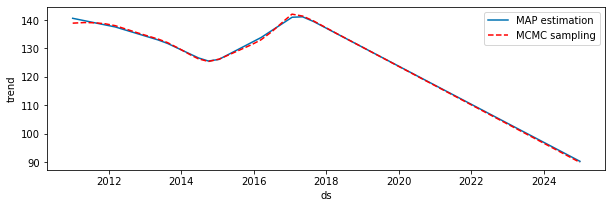

In [14]:
plt.figure(figsize=(10, 3))

plt.plot(f0['ds'], f0['trend'], color='#0072B2', label='MAP estimation')

plt.plot(forecast['ds'], forecast['trend'], color='r', ls='--', label='MCMC sampling')

plt.ylabel('trend')
plt.xlabel('ds')
plt.legend()
plt.show()

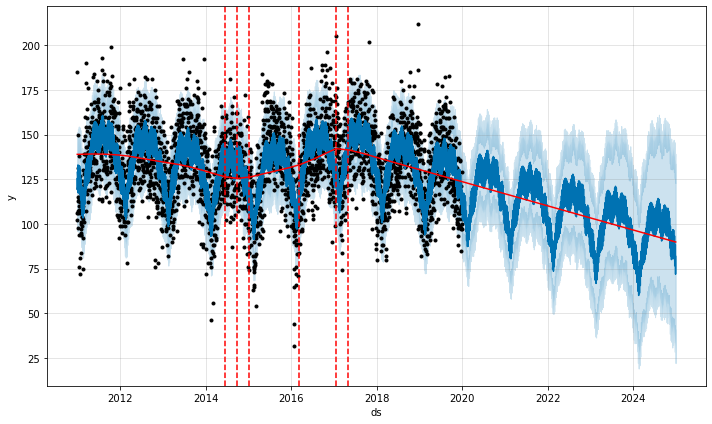

In [15]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, threshold=0.1)
plt.show()

In [16]:
# Saving for use later
m1 = model
f1 = forecast

10:38:47 - cmdstanpy - INFO - CmdStan installation c:\users\gregr\appdata\local\programs\python\python38\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
10:38:47 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
10:38:47 - cmdstanpy - INFO - CmdStan start processing
10:38:47 - cmdstanpy - INFO - Chain [1] start processing
10:38:47 - cmdstanpy - INFO - Chain [2] start processing
10:38:47 - cmdstanpy - INFO - Chain [3] start processing
10:38:47 - cmdstanpy - INFO - Chain [4] start processing
10:47:27 - cmdstanpy - INFO - Chain [1] done processing
10:47:31 - cmdstanpy - INFO - Chain [4] done processing
10:47:49 - cmdstanpy - INFO - Chain [2] done processing
10:47:53 - cmdstanpy - INFO - Chain [3] done processing
10:47:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to

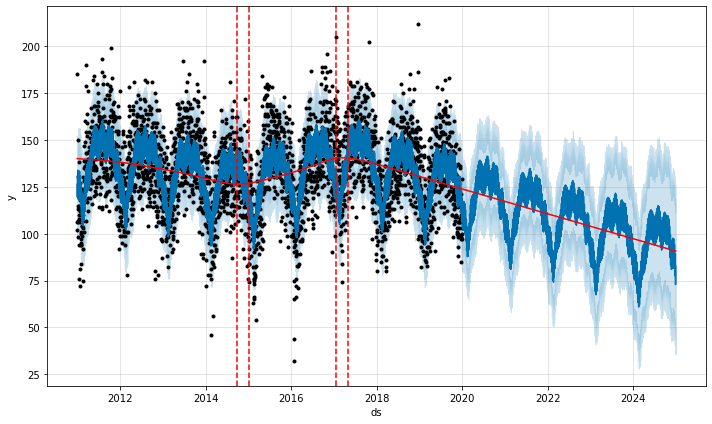

In [17]:
model = Prophet(changepoint_prior_scale=0.03,
                mcmc_samples=300)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, threshold=0.1)
plt.show()

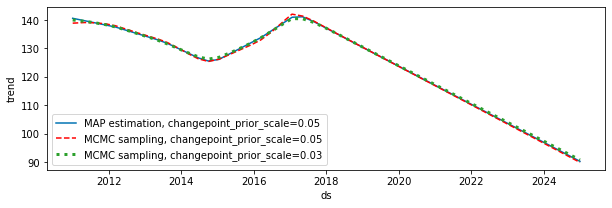

In [18]:
plt.figure(figsize=(10, 3))

plt.plot(f0['ds'],
         f0['trend'],
         color='#0072B2',
         label='MAP estimation, changepoint_prior_scale=0.05')

plt.plot(f1['ds'],
         f1['trend'],
         color='r',
         ls='--',
         label='MCMC sampling, changepoint_prior_scale=0.05')

plt.plot(forecast['ds'],
         forecast['trend'],
         color='tab:green',
         ls=':',
         lw=3,
         label='MCMC sampling, changepoint_prior_scale=0.03')

plt.ylabel('trend')
plt.xlabel('ds')
plt.legend()
plt.show()